In [1]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# %pylab
# pd.set_option('display.mpl_style', 'default')
# import scipy.integrate
plt.style.use(astropy_mpl_style)

In [2]:
#Need to get rid of 0 points (non readings) and bad readings
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    
    return fig,ax1,ax2,ax3
def StackedPlot(xlab1='',ylab1='',xlab2='',ylab2='',\
                hspace=0.0,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=11,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    
    fig,axarr =plt.subplots(2,1,figsize=(size_x,size_y),sharex=True,sharey=True)
    gs=gridspec.GridSpec(2,1,height_ratios=(9, 1))
    gs.update(hspace=hspace)
    
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xticks([3,4,5,6,7,8])
#     ax2.
#     ax2.set_xlim
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    if Grid:
        axs[0].grid()
        axs[1].grid()
    return fig,ax1,ax2

/tmp/ipykernel_690366/502220095.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_690366/352022178.py:94: RuntimeWarning: divide by zero encountered in log10
  ax.set_ylim(bottom=-9.5, top=(max(log10(f_nu2)))/2)
/tmp/ipykernel_690366/352022178.py:97: RuntimeWarning: divide by zero encountered in log10
  plt.plot(A,log10(f_nu2),label='Unattenuated')
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyte

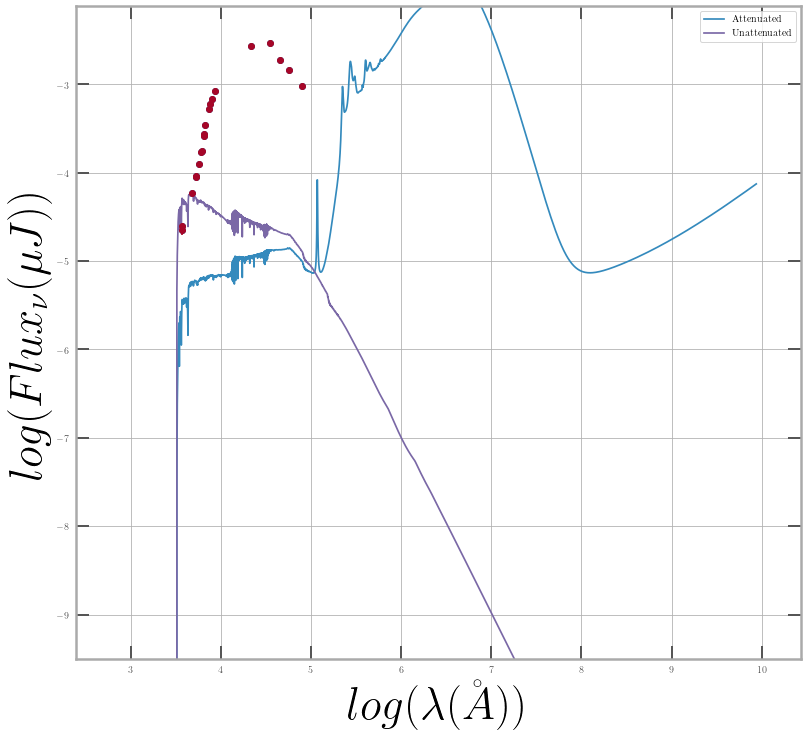

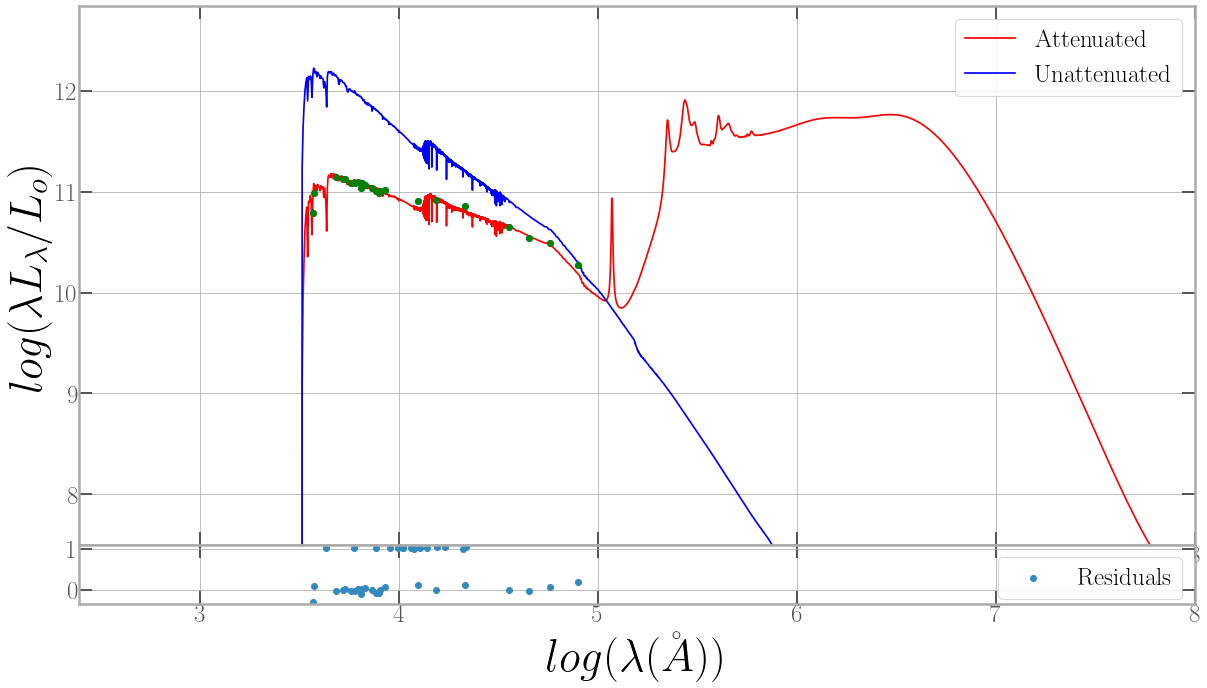

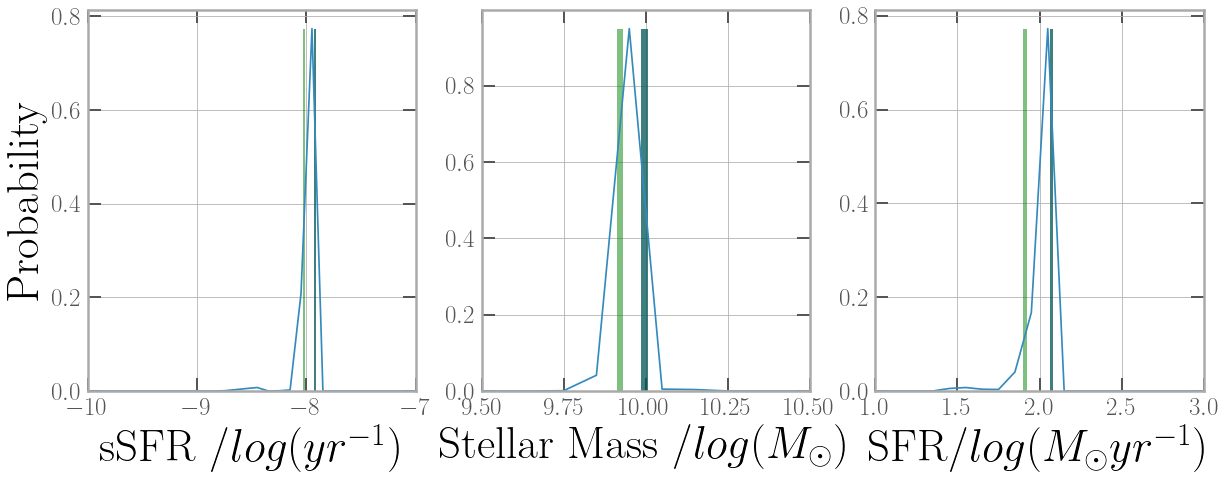

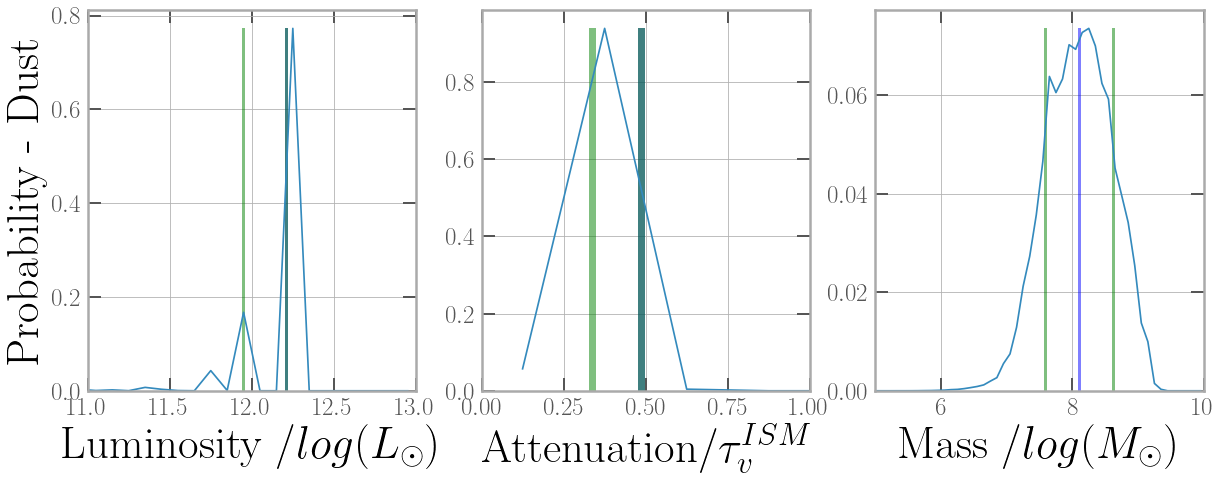

In [3]:
# %%capture
path = os.path.expanduser('~/Documents/H5K/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
chestnut1=[]
sunshine1=[]
rainbow1=[]
# crap=array([1,1,1,1,1,1])
for Treesa in range(1):
#     potato=str(Montague['id'][Treesa])
    potato=str(1368)
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=0,on_bad_lines='skip')
    short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
    short2 = pd.DataFrame(columns=['Name'])
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    galaxy_fit3 = pd.DataFrame(columns=[])
    galaxy_fit_s = galaxy_fit.drop(galaxy_fit.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])

    chi2 = float(galaxy_fit.index[6].split()[2])
    chestnut1.append(chi2)
    Stellar_mass = float(galaxy_fit.index[8].split()[5])
    sunshine1.append(Stellar_mass)
    StarForm = float(galaxy_fit.index[8].split()[15])
    rainbow1.append(StarForm)
    for i in range(len(short)):
        line = short.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=3:
            continue
        str_line = " ".join(str(item) for item in line)
        short2.loc[i]=str(str_line)

    short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

    short2=short2.drop(['Name'],axis=1)

    SED = Table.from_pandas(short2)
    A=[float(s) for s in SED['A']]
    B=[float(s) for s in SED['B']]
    C=[float(s) for s in SED['C']]
    #SED FILE is in L_lambda/LoA^-1. A is log of the wavelength in angstroms
    
    redshift =float(galaxy_fit.index[6].split()[-1])
    light=2.998*(10**18) #speed of light in Angstroms ~ A/s
    lambda_cA = lambda_c*10000 #central wavelength in Angstroms
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    dist = meters.value
    B = np.array(B)
    A = np.array(A)
    L_lambda = 10**B #L_0/Angstroms
    lambd = 10**A #Angstroms
    L_nu=L_lambda*lambd**2/light #L_0
    f_nu = (L_nu*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    f_nu = f_nu/10**-26
    # print(f_nu)

    C = np.array(C)
    L_lambda2=10**C
    L_nu2=L_lambda2*lambd**2/light
    f_nu2 =(L_nu2*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    f_nu2 = f_nu2/10**-26

#Scuffed error calculation. yerr/y *0.434 = error for log plot





    error=0.434*((Montague.iloc[0,3:len(Montague.iloc[0])][::2]*(1+redshift)))/(Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))
    error=[]                                                                           
    for i in range(len((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift)))):
        grape=0.434*((Montague.iloc[0,3:len(Montague.iloc[0])][::2][i]*(1+redshift)))/(Montague.iloc[0,2:len(Montague.iloc[0])][::2][i]*(1+redshift))
    #     list(error)
    #     mylist = list()
        error.append(grape)
    #     print()
    #     list.append(error)
    # error   

                                                                           
                                                                           

# fig=plt.figure(figsize=(15,8))
# ax = fig.add_axes([0.15, 0.1, 0.7, 0.7])
# ax.set_ylabel('$log(f_{\nu})$',fontsize='16')
# ax.set_xlabel('$log(\lambda (A))$',fontsize='16')
# ax.set_ylim(bottom=-9.5, top=-3)
    fig,ax=FancyPlot(r'$log(\lambda (\AA))$',r'$log(Flux_{\nu} (\mu J))$')
    ax.set_ylim(bottom=-9.5, top=(max(log10(f_nu2)))/2)
    ax.set_xlim(left=min(A)/1.05,right=max(A)*1.05)
    plt.plot(A,log10(f_nu),label='Attenuated')
    plt.plot(A,log10(f_nu2),label='Unattenuated')
    plt.legend()
    plt.scatter(log10(lambda_cA),log10((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))))
    plt.errorbar(x=log10(lambda_cA),y=log10((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))),yerr=error,fmt='o')
    plt.savefig(potato+'Flux'+'-Highz')
# SED
# ((Montague.iloc[0,3:len(Montague.iloc[0])][::2]*(1+redshift)))

# Montague.iloc[0,2:len(Montague.iloc[0])]

# Montague.iloc[0,2:len(Montague.iloc[0])][::2]

    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=40:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
    names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    # galaxy_fit2

# galaxy_fit2[]

# Filters

    test=Table.from_pandas(galaxy_fit2)
    L_nu=[float(s) for s in test[0]] #First row.
    L_nu_err=[float(s) for s in test[1]] #Second row
    L_nu=np.array(L_nu) #Luminosity per unit Hz - L_o/s^-1 = L_o*s This is a flux unit but it's not Janskys. 
    L_nu_err=np.array(L_nu_err)

    L_nu_err=L_nu_err#*(1+redshift)
    lL_lambda_err=L_nu_err*light/lambda_cA


    L_nu = L_nu*(1+redshift)

    L_lambda=L_nu*light/(lambda_cA)**2 #L_o*s * A/s /A^2 = L_o/A
    lL_lambda=L_lambda*lambda_cA #A *L_o/A =L_o

    yerrz=0.434*(lL_lambda_err)/lL_lambda
    lL_lambda=lL_lambda.tolist()
    for i in range(len(lL_lambda)):
        if lL_lambda[i]<0:
            lL_lambda[i]=nan
    for i in range(len(lL_lambda)):
        if log10(yerrz[i]) > log10(lL_lambda[i]):
            yerrz[i] = nan
#     print(yerrz)

    # import numpy as np
    arr = np.array(A) #log(A) from SED file
    arr2 = 10**(arr) #Angstroms (A)
    wavelengths = arr2.tolist() #A
    Qlog=log10(wavelengths) #log(A)
    Atten = np.array(B) #log(L_o/A)
    D = (10**Atten)*wavelengths #L_o/A *A = L_o


    # D_nu = D*(arr2**2)/light#(lambda^2)/c * L_lambda
    # print(D_nu)
    # print(X)
    # Flux_at = (D_nu*3.826*10**26)*(1+3.531)/(4*pi*(x)**2)#Joules s-1 m-2
    # Flux_at=Flux_at/10**(-26) #Janksys
    # Flux_at = Flux_at.value.tolist()
    # print(Flux_at)

    D=D.tolist()
    # D = (10**Atten)*Q #L_o/A *A = L_o     #*10000) #Luminosity per unit lambda
    Unatten = np.array(C)
    E = (10**Unatten)*wavelengths  

    # E_nu = E*(arr2**2)/light
    # Flux_un = (E_nu*3.826*10**26)*(1+3.531)/(4*pi*(x)**2)#Joules s-1 m-2
    # Flux_un = Flux_un/10**(-26) #Janksys
    # Flux_un = Flux_un.value.tolist()

    E=E.tolist()     #*10000) #^
    Atten_log=log10(D) #log(L_o)
    Unatten_log=log10(E)
    z=log10(lL_lambda) #log(L_o)
    t=log10(lambda_cA) #log(A)
    # Flux_at_log = log10(Flux_at) #log Janskys
    # Flux_un_log = log10(Flux_un) #log Janskys
    # print(Flux_at_log)
    # print(Atten_log)

    L_obs =[float(s) for s in test[2]]#Third Row
    L_obs =np.array(L_obs)
    Res = (L_nu - L_obs*(1+redshift))/L_nu
    for i in range(len(Res)):
        if log10(-Res[i])>5:
            Res[i]=nan
#     fig,ax=plt.subplots()
#     plt.scatter(t,Res)
#     ax.set_ylim(-1.2,1.2)

#     fig,ax=FancyPlot(r'$log(\lambda (A))$',r'$log(\lambda L_\lambda /L_o )$', size_x=15,size_y=10)
    # ax = fig.add_axes([0.15, 0.1, 0.7, 0.7])
    # ax.set_ylabel('$log(\lambda L_\lambda /L_o )$',fontsize='16')
    # ax.set_xlabel('$log(\lambda (A))$',fontsize='16')
#     fig,ax=FancyPlot(r'$log(\lambda (A))$',r'$log(f_{\nu})$')
#     ax.set_ylim(bottom=-9.5, top=(max(log10(f_nu2)))/2)
#     ax.set_xlim(left=min(A)/1.05,right=max(A)*1.05)
    fig,ax1,ax2=StackedPlot('',r'$log(\lambda L_\lambda /L_o )$',r'$log(\lambda (\AA))$','')
    ax1.set_ylim(bottom=7.5, top=max(Unatten_log)*1.05)
    ax1.set_xlim(left=min(Qlog)/1.05,right=8)
#     ax1.rcParams['font.size'] = '18'
    ax1.plot(Qlog,Atten_log,label='Attenuated',c='red')
    ax1.plot(Qlog,Unatten_log,label='Unattenuated',c='blue')
    ax1.legend()
    ax1.scatter(t,z)#,label='*$\lambda$')
    ax1.errorbar(t,z,yerr=yerrz,fmt='o',c='green')
#     axs[1] = plt.axes([0,0,1,1])
    # Manually set the position and relative size of the inset axes within ax1
#     ip = InsetPosition(ax, [0.2,0.,0.26,0.2])
#     ax2.set_axes_locator(ip)
    ax2.set_xlim(left=min(A)/1.05,right=8)
    ax2.scatter(t,Res,label='Residuals')
    ax2.legend()
    plt.savefig(potato+'Luminosity'+'-Highz')
    
    for i in range(len(galaxy_fit_s)):
        line = galaxy_fit_s.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=1:
    #         galaxy_fit3 = galaxy_fit3.reset_index(drop=True)
            ok=pd.DataFrame(line)
            galaxy_fit3=pd.concat([galaxy_fit3,ok],axis=1)
            continue

        str_line = " ".join(str(item) for item in line)
        galaxy_fit3.loc[i]=str(str_line)


    Properties=galaxy_fit3.T
    Properties.rename(columns={0:'A',1:'B',2:'C',3:'D',4:'E'}, inplace=True)
    Properties.reset_index(inplace=True,drop=True)
    for col in Properties.select_dtypes(['object']):
        Properties[col] = pd.to_numeric(Properties[col].str.rstrip('%'), errors='coerce')

    fig,ax1,ax2,ax3=HexPlot(r'sSFR /$log(yr^{-1})$',r'Probability',r'Stellar Mass /$log(M_\odot)$','',r'SFR/$log(M_\odot yr^{-1})$',wspace=0.20)
#     plt.figure(0)
#     plt.plot(Properties.iloc[0:20]['A'],Properties.iloc[0:20]['B'],label='oops')
#     plt.scatter(Properties.T[21],Properties.iloc[21],label='oops')
#     plt.figure(1)
    ax1.plot(Properties.iloc[232:302]['A'],Properties.iloc[232:302]['B'],label='sSFR')
#     ax1.hist(Properties.iloc[232:302]['B'],bins=20)
    damn =max(Properties.iloc[232:302]['B'])
#     prac =array([damn/4,damn/2,damn,damn/2,damn/4,nan])
    prac =array([0,damn,damn,damn,0,nan])
#     ax1.set_xlim(left=8,right=11)
    ax1.bar(Properties.T[303],prac,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
    ax1.set_xlim(left=-10,right=-7)
    #     plt.figure(2)
#     ax1.scatter(Percentiles_sSFR,Properties.T[254])
    ax2.plot(Properties.iloc[305:375]['A'],Properties.iloc[305:375]['B'],label='Stellar Mass')
    damn2=max(Properties.iloc[305:375]['B'])
#     prac2=array([damn2/4,damn2/2,damn2,damn2/2,damn2/4,nan])
    prac2 =array([0,damn2,damn2,damn2,0,nan])
#     ax2.hist(Properties.iloc[305:375]['B'],bins=20)
    ax2.bar(Properties.T[376],prac2,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
    ax2.set_xlim(left=9.5,right=10.5)
    #     ax3.hist(Properties.iloc[603:663]['B'],bins=20)
#     ax3.scatter(Properties.T[664],crap)
#     plt.figure(3)
    ax3.plot(Properties.iloc[735:795]['A'],Properties.iloc[735:795]['B'],label='SFR')
    damn3=max(Properties.iloc[735:795]['B'])
#     prac3=array([damn3/4,damn3/2,damn3,damn3/2,damn3/4,nan])
    prac3 =array([0,damn3,damn3,damn3,0,nan])
    ax3.bar(Properties.T[796],prac3,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
    ax3.set_xlim(left=1,right=3)
    #     plt.figure(4)
    plt.savefig(potato+'Stellar Histograms'+'-Highzx',bbox_inches='tight')
    fig,ax1,ax2,ax3=HexPlot(r'Luminosity /$log(L_\odot)$',r'Probability - Dust',r'Attenuation/$\tau_v^{ISM}$','',r'Mass /$log(M_\odot)$',wspace=0.20)
    ax1.plot(Properties.iloc[378:448]['A'],Properties.iloc[378:448]['B'],label='Dust Luminosity')
#     plt.figure(5)
#     ax1.hist(Properties.iloc[378:448]['B'],bins=20)
    damn4=max(Properties.iloc[378:448]['B'])
#     prac4=array([damn4/4,damn4/2,damn4,damn4/2,damn4/4,nan])
    prac4 =array([0,damn4,damn4,damn4,0,nan])
    ax1.bar(Properties.T[449],prac4,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
    ax1.set_xlim(left=11,right=13)
    ax2.plot(Properties.iloc[589:669]['A'],Properties.iloc[589:669]['B'],label='Dust Attenuation')
    damn5=max(Properties.iloc[589:669]['B'])
#     prac5=array([damn5/4,damn5/2,damn5,damn5/2,damn5/4,nan])
    prac5 =array([0,damn5,damn5,damn5,0,nan])
#     ax2.hist(Properties.iloc[318:329]['B'],bins=20)
    ax2.bar(Properties.T[670],prac5,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax3.hist(Properties.iloc[540:600]['B'],bins=20)
#     ax3.scatter(Properties.T[601],crap)
#     plt.figure(6)
    ax2.set_xlim(left=0,right=1)
    ax3.plot(Properties.iloc[672:732]['A'],Properties.iloc[672:732]['B'],label='Dust Mass')
    damn6=max(Properties.iloc[672:732]['B'])
#     prac6=array([damn6/4,damn6/2,damn6,damn6/2,damn6/4,nan])
    prac6 =array([0,damn6,damn6,damn6,0,nan])
    ax3.set_xlim(left=5,right=10)
    ax3.bar(Properties.T[733],prac6,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.05)
    plt.savefig(potato+'Dust Histograms'+'-Highzx',bbox_inches='tight')


In [29]:
# Properties.T[302
#             ]
# plt.plot(array([1,2,3,4,5]),array([2,2,2,2,2]))
galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
galaxy_fit2 = pd.DataFrame(columns=['Full'])
Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
galaxy_fit

""
# OBSERVED FLUXES (and errors):
# WFI_U38 U B IA484 IA527 WFI_V IA574 V IA598 IA624 R WFI_Rc IA651 IA679 IA738 IA767 I IA797 F814W IA856 Z F098M J1 F105W J2 NB118 F125W J3 F140W F160W Hs Hl NB209 Ks tenisK KsHI IRAC_36 IRAC_45 IRAC_58 IRAC_80
-3.620E-06 -1.268E-06 4.816E-06 1.079E-05 1.752E-05 2.860E-05 3.333E-05 2.776E-05 2.895E-05 2.969E-05 2.908E-05 2.883E-05 2.340E-05 2.567E-05 3.836E-05 5.731E-06 2.742E-05 3.791E-05 2.811E-05 -4.483E-06 2.961E-05 -6.536E-03 1.250E-05 2.781E-05 7.289E-06 6.317E-05 2.733E-05 6.245E-06 3.338E-05 3.013E-05 6.344E-06 6.575E-05 -1.086E-04 6.462E-05 7.042E-05 8.891E-05 2.715E-05 4.008E-05 5.722E-05 4.726E-05
9.732E-06 9.581E-07 3.008E-06 3.492E-06 3.654E-06 3.545E-06 9.261E-06 2.728E-06 3.553E-06 4.118E-06 1.454E-06 3.170E-06 3.230E-06 4.078E-06 4.429E-06 1.126E-05 5.125E-06 1.272E-05 2.799E-06 1.688E-05 6.811E-06 -6.536E-03 1.393E-05 3.966E-06 1.420E-05 3.349E-05 3.498E-06 1.640E-05 1.183E-05 4.152E-06 2.435E-05 2.432E-05 6.066E-05 3.683E-05 1.933E-05 5.467E-06 4.531E-06 5.006E-06 4.884E-05 5.327E-05
#
# ... Results of fitting the fluxes to the model.....
...
67.5000 6.906E-002
72.5000 3.941E-002
77.5000 1.294E-002


In [32]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# Properties.head(1156)
for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=40:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


names = []
for i in range(len(Filters['Name'])):
    names.append(Filters.iloc[i,0])
names
galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)

In [26]:
len(names)
# Properties.T[376]

32

(array([34., 18.,  9.,  4.,  2.,  3.,  1.,  2.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.]),
 array([ 0.826     ,  2.27066667,  3.71533333,  5.16      ,  6.60466667,
         8.04933333,  9.494     , 10.93866667, 12.38333333, 13.828     ,
        15.27266667, 16.71733333, 18.162     , 19.60666667, 21.05133333,
        22.496     ]),
 <BarContainer object of 15 artists>)

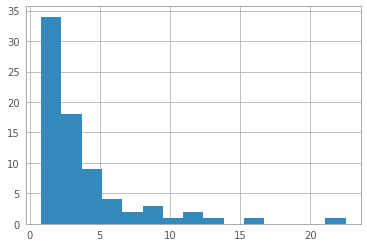

In [7]:
plt.hist(chestnut1,bins=15)

In [11]:
# Properties.iloc[305:377]
%store chestnut1
%store sunshine1
%store rainbow1

Stored 'chestnut1' (list)
Stored 'sunshine1' (list)
Stored 'rainbow1' (list)


In [9]:
# damn =max((Properties.iloc[232:302]['B']))
# damn